# Import Libs

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys, os, scipy, sklearn
import sklearn.metrics, sklearn.preprocessing, sklearn.model_selection

In [4]:
mpl.rcParams['font.size'] = 14

# Load Data

In [5]:
data_folder = './data/chapter_2/'
data_files = os.listdir(data_folder)
for file_name in data_files:
    globals()[file_name.replace('.csv','')] = pd.read_csv(data_folder+file_name)
    print(file_name)
    display(globals()[file_name.replace('.csv','')].head(), globals()[file_name.replace('.csv','')].shape)

creditcard_sampledata_2.csv


,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,221547,-1.191668,0.428409,1.640028,-1.848859,-0.870903,-0.204849,-0.385675,0.352793,-1.098301,...,0.507173,1.292565,-0.467752,1.244887,0.697707,0.059375,-0.319964,-0.017444,27.44,0
1,184524,1.966614,-0.450087,-1.228586,0.142873,-0.150627,-0.543590,-0.076217,-0.108390,0.973310,...,0.124055,0.564916,-0.039331,-0.283904,0.186400,0.192932,-0.039155,-0.071314,35.95,0
2,91201,1.528452,-1.296191,-0.890677,-2.504028,0.803202,3.350793,-1.633016,0.815350,-1.884692,...,-0.412088,-1.017485,0.129566,0.948048,0.287826,-0.396592,0.042997,0.025853,28.40,0
3,26115,-0.774614,1.100916,0.679080,1.034016,0.168633,0.874582,0.209454,0.770550,-0.558106,...,0.011158,0.146017,-0.130401,-0.848815,0.005698,-0.183295,0.282940,0.123856,43.20,0
4,201292,-1.075860,1.361160,1.496972,2.242604,1.314751,0.272787,1.005246,0.132932,-1.558317,...,0.254485,0.530692,-0.651119,0.626389,1.040212,0.249501,-0.146745,0.029714,10.59,0


(7300, 31)

# Define X, y

In [6]:
df = creditcard_sampledata_2
X = np.array(df.drop(columns = ['Unnamed: 0','Class','Amount']))
y = np.array(df['Class'])

print(X.shape,y.shape)

(7300, 28) (7300,)


# Natural Hit Rate

In [7]:
# Count the total number of observations from the length of y
total_obs = len(y)

# Count the total number of non-fraudulent observations 
non_fraud = [i for i in y if i == 0]
count_non_fraud = non_fraud.count(0)

# Calculate the percentage of non fraud observations in the dataset
percentage = (float(count_non_fraud)/float(total_obs)) * 100

# Print the percentage: this is our "natural accuracy" by doing nothing
print(percentage)

95.8904109589041


# Random Forest Classifier

In [8]:
# Import the random forest model from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split your data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define the model as the random forest
model = RandomForestClassifier(random_state=5)

In [9]:
# Fit the model to our training set
model.fit(X_train, y_train)

# Obtain predictions from the test data 
predicted = model.predict(X_test)

/Users/johnleonard/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [10]:
# Fit the model to our training set
model.fit(X_train, y_train)

# Obtain predictions from the test data 
predicted = model.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score

# Print the accuracy performance metric
print(accuracy_score(y_test, predicted))

0.9908675799086758


# Performance Evaluation

$ Precision = \frac{True Positives}{True Positives + False Positives}$

$ Recall = \frac{True Positives}{True Positives + False Negatives}$

* As precision increases, recall falls (precision recall curve)

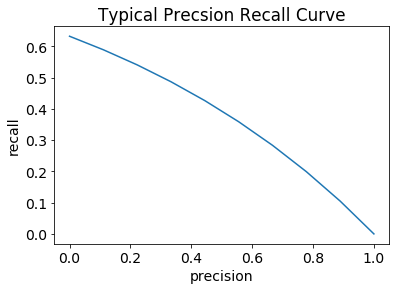

In [12]:
precision = np.linspace(0,1,10)
recall = 1-np.exp(precision-1)

plt.title('Typical Precsion Recall Curve')
plt.plot(precision, recall)
plt.xlabel('precision')
plt.ylabel('recall')
plt.show()

F score combines precision and recall

$ F_{score} = \frac{2\times precision \times recall}{precision + recall} = \frac{2\times TP}{2\times TP\times FP\times FN}$

Another useful metrics is the ROC (receiver operator) curve. Created by plotting the true positive vs. false positive rate for various threshold conditions. It is useful for comparing different models

The confusion matrix and classification report is also very useful.

# Performance metrics for the RF Model

In [13]:
# Import the packages to get the different performance metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Obtain the predictions from our random forest model 
predicted = model.predict(X_test)

# Predict probabilities
probs = model.predict_proba(X_test)

# Print the ROC curve, classification report and confusion matrix
print('roc_auc_score:\n\t',roc_auc_score(y_test, probs[:,1]))
print('classification_report:\n',
      classification_report(y_test, predicted))
print('confusion_matrix:\n',confusion_matrix(y_test, predicted))

roc_auc_score:
	 0.933440309095383
classification_report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2099
           1       0.99      0.79      0.88        91

    accuracy                           0.99      2190
   macro avg       0.99      0.90      0.94      2190
weighted avg       0.99      0.99      0.99      2190

confusion_matrix:
 [[2098    1]
 [  19   72]]


# Plotting Precision Recall Curve

In [14]:
from sklearn.metrics import average_precision_score

# Calculate average precision and the PR curve
average_precision = average_precision_score(y_test, predicted)
average_precision

0.7890461137036479

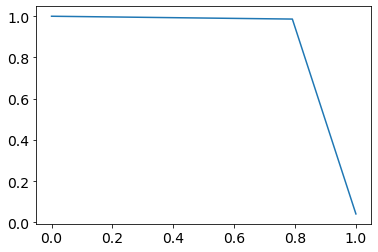

In [15]:
from sklearn.metrics import precision_recall_curve

# Calculate average precision and the PR curve
average_precision = average_precision_score(y_test, predicted)

# Obtain precision and recall 
precision, recall, _ = precision_recall_curve(y_test, predicted)

# Plot the recall precision tradeoff
plt.plot(recall, precision)
plt.show()

# Model Adjustment

A simple way to adjust the random forest model to deal with highly imbalanced fraud data, is to use the class_weights option when defining your sklearn model. However, as you will see, it is a bit of a blunt force mechanism and might not work for your very special case.

In [16]:
# Define the model with balanced subsample
model = RandomForestClassifier(class_weight='balanced_subsample', random_state=5)

# Fit your training model to your training set
model.fit(X_train, y_train)

# Obtain the predicted values and probabilities from the model 
predicted = model.predict(X_test)
probs = model.predict_proba(X_test)

# Print the ROC curve, classification report and confusion matrix
print('roc_auc_score:\n\t',roc_auc_score(y_test, probs[:,1]))
print('classification_report:\n',
      classification_report(y_test, predicted))
print('confusion_matrix:\n',confusion_matrix(y_test, predicted))

roc_auc_score:
	 0.9452067703616059
classification_report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2099
           1       1.00      0.80      0.89        91

    accuracy                           0.99      2190
   macro avg       1.00      0.90      0.94      2190
weighted avg       0.99      0.99      0.99      2190

confusion_matrix:
 [[2099    0]
 [  18   73]]


/Users/johnleonard/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# Adjusting your Random Forest to fraud detection

In this exercise you're going to dive into the options for the random forest classifier, as we'll assign weights and tweak the shape of the decision trees in the forest. You'll define weights manually, to be able to off-set that imbalance slightly. In our case we have 300 fraud to 7000 non-fraud cases, so by setting the weight ratio to 1:12, we get to a 1/3 fraud to 2/3 non-fraud ratio, which is good enough for training the model on.

In [33]:
def get_model_results(X_train, y_train, X_test, y_test, model):
    # Fit your training model to your training set
    model.fit(X_train, y_train)

    # Obtain the predicted values and probabilities from the model 
    #predicted = model.predict(X_test)
    #probs = model.predict_proba(X_test)

    # Print the ROC curve, classification report and confusion matrix
    #print('roc_auc_score:\n\t',roc_auc_score(y_test, probs[:,1]))
    print('classification_report:\n',
          classification_report(y_test, predicted))
    print('confusion_matrix:\n',confusion_matrix(y_test, predicted))

# Change the model options
model = RandomForestClassifier(bootstrap=True, 
                               class_weight={0:1, 1:12}, 
                               criterion='entropy',

                                # Change depth of model
                                max_depth=10,

                                # Change the number of samples in leaf nodes
                                min_samples_leaf=10, 

                                # Change the number of trees to use
                                n_estimators=20, n_jobs=-1, random_state=5)

# Run the function get_model_results
get_model_results(X_train, y_train, X_test, y_test, model)

classification_report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2099
           1       1.00      0.80      0.89        91

    accuracy                           0.99      2190
   macro avg       1.00      0.90      0.94      2190
weighted avg       0.99      0.99      0.99      2190

confusion_matrix:
 [[2099    0]
 [  18   73]]


# GridSearchCV to find optimal Parameters

In this exercise you're going to tweak our model in a less "random" way, but use GridSearchCV to do the work for you.

With GridSearchCV you can define which performance metric to score the options on. Since for fraud detection we are mostly interested in catching as many fraud cases as possible, you can optimize your model settings to get the best possible Recall score. If you also cared about reducing the number of false positives, you could optimize on F1-score, this gives you that nice Precision-Recall trade-off.

GridSearchCV has already been imported from sklearn.model_selection, so let's give it a try!

In [23]:
from sklearn.model_selection import GridSearchCV

# Define the parameter sets to test
param_grid = {'n_estimators': [1,30], 
                'max_features': ['auto', 'log2'], 
                'max_depth': [4, 8], 
                'criterion': ['gini', 'entropy']
                }
            

# Define the model to use
model = RandomForestClassifier(random_state=5)

# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, 
                        param_grid=param_grid, 
                        cv=5, 
                        scoring='recall', 
                        n_jobs=-1)

# Fit the model to our training data and obtain best parameters
CV_model.fit(X_train, y_train)
CV_model.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 30}

# Model results using GridSearchCV

You discovered that the best parameters for your model are that the split criterion should be set to 'gini', the number of estimators (trees) should be 30, the maximum depth of the model should be 8 and the maximum features should be set to "log2".

Let's give this a try and see how well our model performs. You can use the get_model_results() function again to save time.

In [24]:
# Input the optimal parameters in the model
model = RandomForestClassifier(class_weight={0:1,1:12}, 
                                criterion='gini',
                                max_depth=8,
                                max_features='log2',
                                min_samples_leaf=10, 
                                n_estimators=30,
                                n_jobs=-1,
                                random_state=5)

# Get results from your model
get_model_results(X_train, y_train, X_test, y_test, model)

classification_report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2099
           1       0.96      0.85      0.90        91

    accuracy                           0.99      2190
   macro avg       0.98      0.92      0.95      2190
weighted avg       0.99      0.99      0.99      2190

confusion_matrix:
 [[2096    3]
 [  14   77]]


# Ensemble: Baseline: Logistic Regression

In this last lesson you'll combine three algorithms into one model with the VotingClassifier. This allows us to benefit from the different aspects from all models, and hopefully improve overall performance and detect more fraud. The first model, the Logistic Regression, has a slightly higher recall score than our optimal Random Forest model, but gives a lot more false positives. You'll also add a Decision Tree with balanced weights to it. The data is already split into a training and test set, i.e. X_train, y_train, X_test, y_test are available.

In order to understand how the Voting Classifier can potentially improve your original model, you should check the standalone results of the Logistic Regression model first.

In [28]:
# Define the Logistic Regression model with weights
model = sklearn.linear_model.LogisticRegression(solver = 'lbfgs',
                                                class_weight={0:1, 1:15}, 
                                                random_state=5)

# Get the model results
get_model_results(X_train, y_train, X_test, y_test, model)

classification_report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      2099
           1       0.65      0.88      0.75        91

    accuracy                           0.98      2190
   macro avg       0.82      0.93      0.87      2190
weighted avg       0.98      0.98      0.98      2190

confusion_matrix:
 [[2056   43]
 [  11   80]]


# Voting Classifier



Let's now combine three machine learning models into one, to improve our Random Forest fraud detection model from before. You'll combine our usual Random Forest model, with the Logistic Regression from the previous exercise, with a simple Decision Tree. You can use the short cut get_model_results() to see the immediate result of the ensemble model.

In [34]:
# Define the three classifiers to use in the ensemble
clf1 = sklearn.linear_model.LogisticRegression(
                            solver = 'lbfgs',
                            class_weight={0:1, 1:15}, 
                            random_state=5)
clf2 = sklearn.ensemble.RandomForestClassifier(class_weight={0:1, 1:12}, 
                            criterion='gini', 
                            max_depth=8, 
                            max_features='log2',
                            min_samples_leaf=10, 
                            n_estimators=30, 
                            n_jobs=-1, 
                            random_state=5)
clf3 = sklearn.tree.DecisionTreeClassifier(random_state=5, 
                        class_weight="balanced")

# Combine the classifiers in the ensemble model
ensemble_model = sklearn.ensemble.VotingClassifier(estimators=[('lr', clf1),
                                            ('rf', clf2), 
                                            ('dt', clf3)],
                                            voting='hard')

# Get the results 
get_model_results(X_train, 
                  y_train, 
                  X_test, 
                  y_test, 
                  ensemble_model)

classification_report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2099
           1       1.00      0.80      0.89        91

    accuracy                           0.99      2190
   macro avg       1.00      0.90      0.94      2190
weighted avg       0.99      0.99      0.99      2190

confusion_matrix:
 [[2099    0]
 [  18   73]]


# Adjust weights within the Voting Classifier


You've just seen that the Voting Classifier allows you to improve your fraud detection performance, by combining good aspects from multiple models. Now let's try to adjust the weights we give to these models. By increasing or decreasing weights you can play with how much emphasis you give to a particular model relative to the rest. This comes in handy when a certain model has overall better performance than the rest, but you still want to combine aspects of the others to further improve your results.

For this exercise the data is already split into a training and test set, and clf1, clf2 and clf3 are available and defined as before, i.e. they are the Logistic Regression, the Random Forest model and the Decision Tree respectively.

In [36]:
# Define the ensemble model
ensemble_model = sklearn.ensemble.VotingClassifier(estimators=[('lr', clf1), 
                                                ('rf', clf2),
                                                ('gnb', clf3)],
                                  voting='soft', 
                                  weights=[1, 4, 1],
                                  flatten_transform=True)

# Get results 
get_model_results(X_train, y_train, X_test, y_test, ensemble_model)

classification_report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2099
           1       1.00      0.80      0.89        91

    accuracy                           0.99      2190
   macro avg       1.00      0.90      0.94      2190
weighted avg       0.99      0.99      0.99      2190

confusion_matrix:
 [[2099    0]
 [  18   73]]
